In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kick = pd.read_csv("ks-projects-201801.csv")
kick.head(50)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [3]:
kick.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [4]:
kick.rename(columns=lambda x: x.strip(), inplace=True)
kick.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
#Convert the deadline and launched dates to datetime objects
kick['deadline'] = pd.to_datetime(kick['deadline'], errors='coerce')
kick['launched'] = pd.to_datetime(kick['launched'], errors='coerce')
#Convert the goal, pledged, and backers columns to numeric
kick['goal'] = pd.to_numeric(kick['goal'], errors='coerce')
kick['pledged'] = pd.to_numeric(kick['pledged'], errors='coerce')
kick['usd pledged'] = pd.to_numeric(kick['usd pledged'], errors='coerce')
kick['backers'] = pd.to_numeric(kick['backers'], errors='coerce')

In [6]:
#Check that everything worked smoothly
kick.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [7]:
#Now, drop all of the rows that have NaN in them
print("Pre-drop: " + str(len(kick)))
kick.dropna(inplace=True)
print("Post-drop: " + str(len(kick)))

Pre-drop: 378661
Post-drop: 374860


Text(0, 0.5, 'Projects')

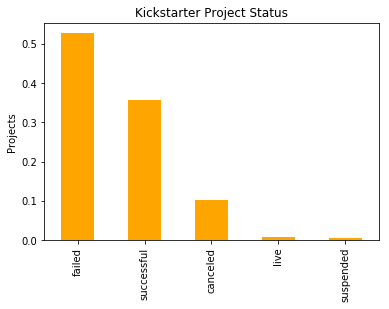

In [8]:
#Distribution of project status
kick['state'].value_counts(normalize=True).plot(kind='bar', color='orange')
plt.title('Kickstarter Project Status')
plt.ylabel('Projects')

Film & Video    0.167252
Music           0.132129
Publishing      0.105050
Games           0.093968
Technology      0.086864
Design          0.080206
Art             0.075100
Food            0.065622
Fashion         0.060855
Theater         0.029110
Comics          0.028861
Photography     0.028752
Crafts          0.023499
Journalism      0.012682
Dance           0.010049
Name: main_category, dtype: float64

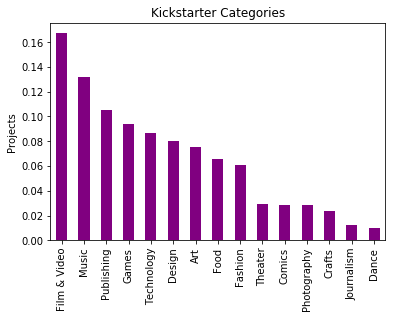

In [9]:
#Distribution of main categories
kick['main_category'].value_counts(normalize=True).plot(kind='bar', color='purple')
plt.title('Kickstarter Categories')
plt.ylabel('Projects')
kick['main_category'].value_counts()/374860

US    292624
GB     33671
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

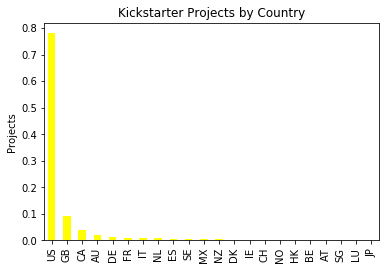

In [10]:
#Distribution of countries
kick['country'].value_counts(normalize=True).plot(kind='bar', color='yellow')
plt.title('Kickstarter Projects by Country')
plt.ylabel('Projects')
kick['country'].value_counts()

In [11]:
#Distribution of goals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
kick['goal'].describe()

count      374860.00
mean        49522.99
std       1189361.60
min             0.01
25%          2000.00
50%          5500.00
75%         16500.00
max     100000000.00
Name: goal, dtype: float64

In [12]:
##The average goal is around 50K, but the standard deviation is more than 1M – and the median is 5K. 
###Let's check out how these compare to the actual amount pledged.
kick['pledged'].describe()

count     374860.00
mean        9750.54
std        96010.94
min            0.00
25%           31.00
50%          620.00
75%         4080.00
max     20338986.27
Name: pledged, dtype: float64

In [13]:
# # These numbers are noticeably lower across the board. We can get a sense for how succesful each 
# project generally is by creating a pledged/goal ratio on a per group basis. First, across state:
stateRatio = kick.groupby('state').agg({'pledged': np.mean, 'goal': np.mean})
stateRatio['ratio'] = stateRatio['pledged'] / stateRatio['goal']
stateRatio

,pledged,goal,ratio
state,,,
canceled,2646.52,86233.11,0.03
failed,1427.45,67363.13,0.02
live,9088.49,76780.89,0.12
successful,24094.39,10166.11,2.37
suspended,10824.33,181648.94,0.06


main_category
Design         0.58
Games          0.43
Dance          0.36
Comics         0.34
Photography    0.28
Fashion        0.26
Music          0.24
Technology     0.19
Crafts         0.17
Theater        0.15
Publishing     0.13
Food           0.11
Art            0.09
Film & Video   0.08
Journalism     0.04
Name: ratio, dtype: float64

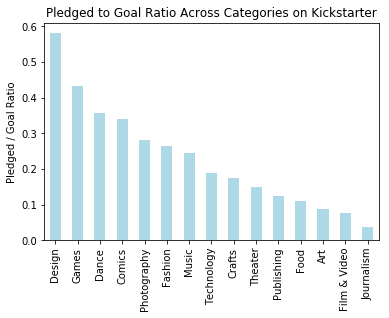

In [14]:
catRatio = kick.groupby('main_category').agg({'pledged': np.mean, 'goal': np.mean})
catRatio['ratio'] = catRatio['pledged'] / catRatio['goal']
catRatio['ratio'].sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Pledged to Goal Ratio Across Categories on Kickstarter')
plt.xlabel('')
plt.ylabel('Pledged / Goal Ratio')
catRatio['ratio'].sort_values(ascending=False)

main_category
Dance          1.89
Theater        1.76
Comics         1.45
Music          1.11
Art            0.81
Games          0.78
Film & Video   0.72
Design         0.71
Publishing     0.53
Photography    0.52
Fashion        0.39
Food           0.38
Crafts         0.37
Journalism     0.32
Technology     0.31
Name: WLratio, dtype: float64

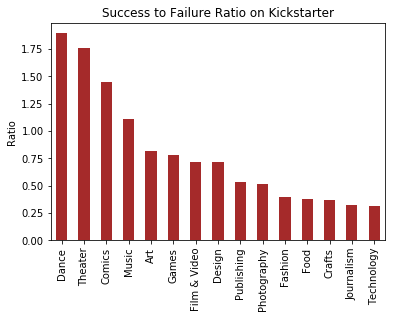

In [15]:
# We can do the same analysis with succesful to failed projects to get a more macro feel for each category
catPivot = kick.pivot_table(index='main_category', columns='state', values='ID', aggfunc='count')
catPivot['WLratio'] = catPivot['successful'] / catPivot['failed']
catPivot['WLratio'].sort_values(ascending=False).plot(kind='bar', color='brown')
plt.title('Success to Failure Ratio on Kickstarter')
plt.xlabel('')
plt.ylabel('Ratio')
catPivot['WLratio'].sort_values(ascending=False)

In [16]:
#Lastly, we would visualize the project outcomes in a concrete graph.
#First, turn our pivot table columns into percentages instead of absolute numbers
catPivot = kick.pivot_table(index='main_category', columns='state', values='ID', aggfunc='count')
catPivot['total'] = catPivot.sum(axis=1)

In [17]:
#Change all columns to percentages of total
for column in catPivot.columns[:5]:
    catPivot[column] = catPivot[column] / catPivot['total']

Text(0, 0.5, 'Percentage of Projects')

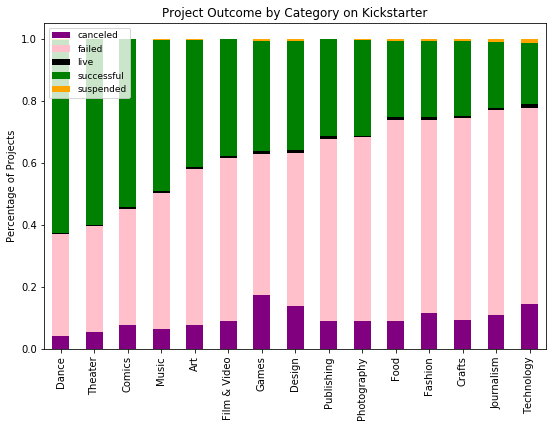

In [18]:
#Plot
catPivot.iloc[:,:5].sort_values(by='successful', ascending=False).plot(kind='bar', stacked=True, figsize=(9,6), 
                         color=['purple', 'pink', 'black','green', 'orange'])
plt.title('Project Outcome by Category on Kickstarter')
plt.legend(loc=2, prop={'size': 9})
plt.xlabel('')
plt.ylabel('Percentage of Projects')

In [19]:
# Classification

# First, let's encode our categorical variables.
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

kickML = kick.copy()
for column in ['category', 'main_category','country']:
    kickML[column] = enc.fit_transform(kickML[column])

In [20]:
kickML

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,108,12,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,9,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,93,6,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,21,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,93,6,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,21,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,90,10,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,21,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,55,6,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,21,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,123,7,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,21,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,21,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,41,7,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,21,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,113,4,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,21,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,39,6,USD,2014-08-10,65000.00,2014-07-11 21:55:48,6240.57,canceled,43,21,6240.57,6240.57,65000.00


In [21]:
# Since we're really only interested in success, we'll narrow down the dataset to only two outcomes – success and failure.
kickML = kickML[kickML['state'].apply(lambda x: x in ['successful', 'failed'])]


In [22]:
# We'll also split the data into train, test, and cross validation sets (70% train, 15% each test and CV)
from sklearn.utils import shuffle
kickML = shuffle(kickML)

In [23]:
def dataSplit(features, target):
    trainx = kickML.iloc[:223526][features]
    trainy = kickML.iloc[:223526][target]
    testx = kickML.iloc[223527:271425][features]
    testy = kickML.iloc[223527:271425][target]
    cvx = kickML.iloc[271426:len(kickML)][features]
    cvy = kickML.iloc[271426:len(kickML)][target]
    
    return trainx, trainy, testx, testy, cvx, cvy

In [24]:
trainx, trainy, testx, testy, cvx, cvy = dataSplit(['category', 'main_category', 'goal', 'country'], 'state')

In [25]:
#1. Decision Trees
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)

In [26]:
clf = clf.fit(trainx, trainy)

In [27]:
# We'll define a function for confusion matrix analysis, since we'll use it a few times.
from sklearn.metrics import confusion_matrix

In [28]:
def printCM(y,y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("True positives: " + str(tp))
    print("False positives: " + str(fp))
    print("True negatives: " + str(tn))
    print("False negatives: " + str(fn))
    print('\n')
    print("Overall accuracy: " + str((tp+tn)/float((tp+tn+fp+fn))))
    print("Precision (tp/tp+fp): " + str(tp/float((tp+fp))))
    print("Recall (tp/tp+fn): " + str(tp/float((tp+fn))))

In [29]:
printCM(trainy, clf.predict(trainx))

True positives: 41942
False positives: 25978
True negatives: 107241
False negatives: 48365


Overall accuracy: 0.6674078183298587
Precision (tp/tp+fp): 0.6175206124852768
Recall (tp/tp+fn): 0.4644379726931467


In [30]:
# Training accuracy is a respectable 67%, but both precision and recall are lower than that number.
printCM(testy, clf.predict(testx))
#Accuracy on the cross validation set is less encouraging. 



True positives: 8934
False positives: 5721
True negatives: 22883
False negatives: 10360


Overall accuracy: 0.6642657313457765
Precision (tp/tp+fp): 0.6096212896622313
Recall (tp/tp+fn): 0.4630455063750389


In [31]:
# ##Naive Bayes
# Let's try a classic, the Naive Bayes Classifier.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [32]:
printCM(trainy, gnb.fit(trainx, trainy).predict(trainx))

True positives: 89162
False positives: 124583
True negatives: 8636
False negatives: 1145


Overall accuracy: 0.43752404641965587
Precision (tp/tp+fp): 0.4171419214484549
Recall (tp/tp+fn): 0.9873210271628999


In [33]:
# Overall accuracy is much lower than other model, but recall is extremely high with a value of 99%.
# The same holds true for the test set:
printCM(testy, gnb.fit(testx, testy).predict(testx))

True positives: 19063
False positives: 26787
True negatives: 1817
False negatives: 231


Overall accuracy: 0.4359263434798948
Precision (tp/tp+fp): 0.4157688113413304
Recall (tp/tp+fn): 0.9880273660205245


In [34]:
# Summary / Conclusion
# Overall, we weren't able to achieve any measure of great accuracy on our prediction tasks. 
# Our classifier maxed out at around 67%,which can be improved.
